<center>

**Exploratory Data Analysis and Documentation On Singapore Airbnb Dataset**

Dataset: https://www.kaggle.com/datasets/jojoker/singapore-airbnb<center> 

In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as pex
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

<font color="lightbeige" size=+1.0><b>Load and Read Dataset</b></font>

In [2]:
data = pd.read_csv('listings.csv')

display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

None

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


<font color="lightbeige" size=+1.0><b>Identify Null Values</b></font>

In [3]:
print('There are a total {} missing values in the dataset.'.format(data.isnull().any().sum()))

There are a total 3 missing values in the dataset.


<font color="lightbeige" size=+1.0><b>Identify Duplicates</b></font>

In [4]:
print('There are {} duplicated rows in the dataset.'.format(data.duplicated().sum()))
data.drop_duplicates(inplace=True)
print('Number of rows after dropping duplicates is {}.'.format(data.shape[0]))

There are 0 duplicated rows in the dataset.
Number of rows after dropping duplicates is 7907.


<font color="lightbeige" size=+1.0><b>Feature Distribution</b></font>

This section shows the distribution of the categorical features. Are catergories within a feature fairly balanced?

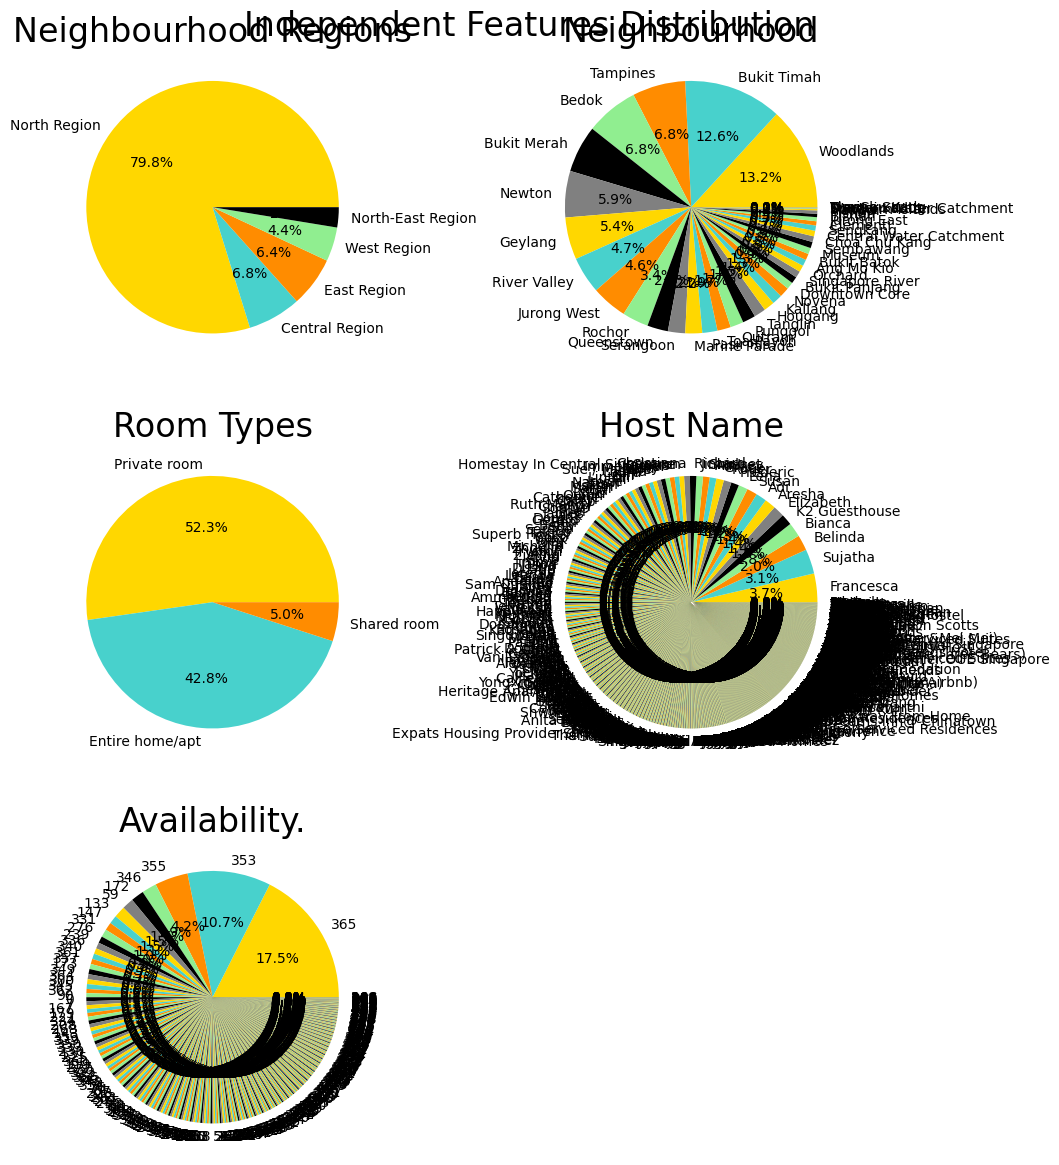

In [5]:
import matplotlib.pyplot as plt

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'black', 'gray']

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Plot the first pie chart for neighbourhood region
axs[0, 0].pie(data['neighbourhood_group'].value_counts(), labels=data['neighbourhood_group'].unique(), autopct='%1.1f%%', colors=colors)
axs[0, 0].set_title('Neighbourhood Regions', fontsize=24)

# Plot the second pie chart for neighbourhood
axs[0, 1].pie(data['neighbourhood'].value_counts(), labels=data['neighbourhood'].unique(), autopct='%1.1f%%', colors=colors)
axs[0, 1].set_title('Neighbourhood', fontsize=24)

# Plot the third pie chart for room type
axs[1, 0].pie(data['room_type'].value_counts(), labels=data['room_type'].unique(), autopct='%1.1f%%', colors=colors)
axs[1, 0].set_title('Room Types', fontsize=24)

# Plot the fourth pie chart for host names
axs[1, 1].pie(data['host_name'].value_counts(), labels=data['host_name'].unique(), autopct='%1.1f%%', colors=colors)
axs[1, 1].set_title('Host Name', fontsize=24)

# Plot the fifth pie chart for Airbnb availability
axs[2, 0].pie(data['availability_365'].value_counts(), labels=data['availability_365'].unique(), autopct='%1.1f%%', colors=colors)
axs[2, 0].set_title('Availability.', fontsize=24)

# Remove the empty subplot
fig.delaxes(axs[2, 1])

# Adjust spacing between subplots
fig.tight_layout()

# Set the overall title and font
fig.suptitle('Independent Features Distribution', fontsize=24, color='black')

# Display the plot
plt.show()

<font color="lightbeige" size=+1.0><b>Distribution of unique district count for each host listings</b></font>

In [6]:
def hostListingAcrossDistrict(df):
    hostListingCityCount = df.groupby("host_id")["neighbourhood"].unique().reset_index()
    hostListingCityCount["district_count"] = hostListingCityCount["neighbourhood"].apply(
        lambda x: len(x)
    )
    print(hostListingCityCount["district_count"].value_counts())
        
hostListingAcrossDistrict(data)

1     2425
2      186
3       47
4       16
5        8
6        7
9        4
7        3
12       2
19       2
11       1
10       1
8        1
18       1
13       1
Name: district_count, dtype: int64


<font color="lightbeige" size=+1.5><b>Distribution of host popularity</b></font>

Percentage of superhost by (neighbourhood, column)

       How do the count of each room type, the average minimum number of nights for stays, 
       and the total number of reviews vary across different neighbourhoods?

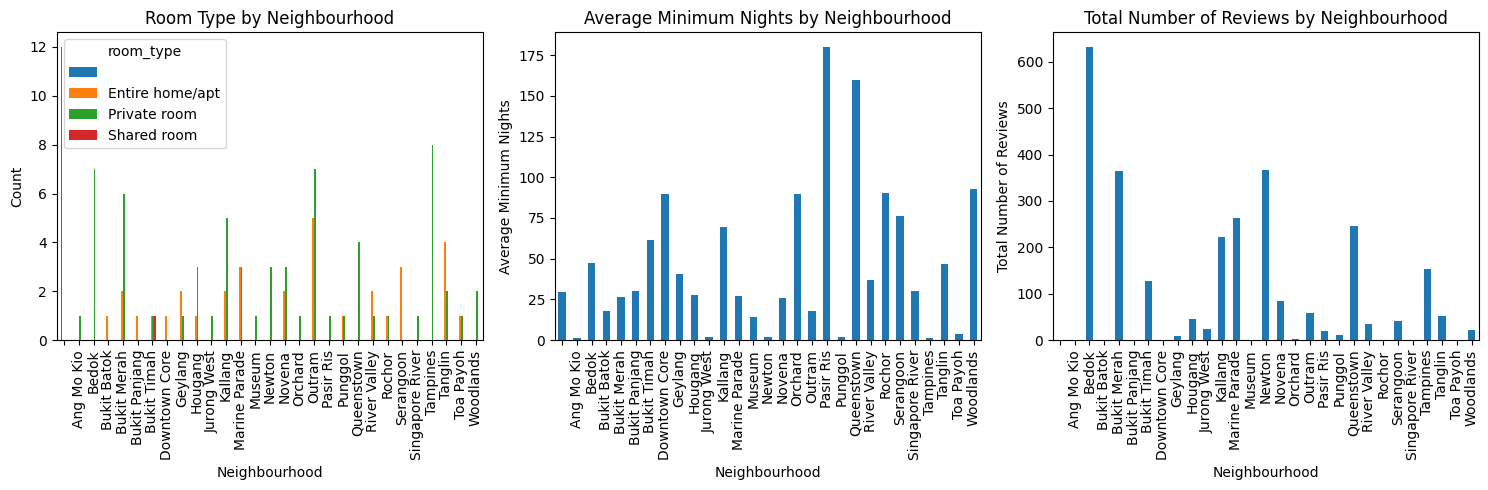

In [8]:
# Bar graph plots for the distribution
import pandas as pd
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'neighbourhood': [
        'Woodlands', 'Bukit Timah', 'Woodlands', 'Tampines', 'Tampines', 'Tampines', 'Tampines', 'Bedok',
        'Bedok', 'Bedok', 'Bukit Merah', 'Bukit Merah', 'Tampines', 'Newton', 'Bukit Merah', 'Bukit Merah',
        'Bukit Merah', 'Tampines', 'Geylang', 'Newton', 'Newton', 'River Valley', 'Tampines', 'Tampines',
        'Jurong West', 'Bukit Timah', 'Rochor', 'Bukit Timah', 'Queenstown', 'Serangoon', 'Bedok', 'Marine Parade',
        'Serangoon', 'Pasir Ris', 'Toa Payoh', 'Outram', 'Punggol', 'Queenstown', 'Tanglin', 'Bukit Merah',
        'Marine Parade', 'Marine Parade', 'Tanglin', 'Bedok', 'Bukit Merah', 'Hougang', 'Kallang', 'Outram',
        'Hougang', 'Novena', 'Geylang', 'Serangoon', 'Downtown Core', 'Outram', 'Punggol', 'Hougang', 'Novena',
        'River Valley', 'Bukit Panjang', 'Hougang', 'Bedok', 'Kallang', 'Kallang', 'Singapore River', 'Marine Parade',
        'Tanglin', 'Tanglin', 'Tanglin', 'Marine Parade', 'Outram', 'Kallang', 'Outram', 'Queenstown', 'Queenstown',
        'Geylang', 'Bedok', 'Outram', 'River Valley', 'Toa Payoh', 'Tanglin', 'Kallang', 'Kallang', 'Novena',
        'Kallang', 'Orchard', 'Bukit Merah', 'Outram', 'Marine Parade', 'Ang Mo Kio', 'Bukit Batok', 'Novena',
        'Rochor', 'Novena', 'Outram', 'Outram', 'Outram', 'Outram', 'Museum', 'Outram'
    ],
    'room_type': [
        'Private room', 'Private room', 'Private room', 'Private room', 'Private room', 'Private room', 'Private room',
        'Private room', 'Private room', 'Private room', 'Private room', 'Private room', 'Private room', 'Private room',
        'Private room', 'Private room', 'Private room', 'Private room', 'Private room', 'Private room', 'Private room',
        'Private room', 'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Private room',
        'Shared room', 'Private room', 'Entire home/apt', 'Private room', 'Private room', 'Entire home/apt',
        'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Private room', 'Private room',
        'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Entire home/apt',
        'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Private room', 'Entire home/apt',
        'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Entire home/apt',
        'Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Private room',
        'Private room', 'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Private room',
        'Private room', 'Private room', 'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Private room',
        'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Entire home/apt',
        'Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Private room',
        'Private room', 'Entire home/apt', 'Private room', 'Entire home/apt', 'Private room', 'Private room',
        'Entire home/apt', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Private room'
    ],
    'minimum_nights': [
        180, 90, 6, 1, 1, 1, 1, 90, 90, 90, 15, 30, 2, 2, 30, 30, 90, 1, 90, 2, 2, 90, 1, 1, 2, 4, 180, 90,
        1, 180, 2, 92, 30, 180, 1, 90, 2, 365, 90, 2, 1, 30, 1, 30, 14, 90, 30, 30, 1, 2, 30, 18, 90, 30, 2,
        18, 5, 14, 30, 1, 14, 180, 30, 30, 18, 90, 90, 1, 2, 2, 60, 1, 183, 90, 2, 14, 2, 7, 7, 7, 6, 90,
        14, 90, 90, 2, 5, 18, 1, 18, 108, 1, 1, 50, 1, 1, 1, 14, 1, 90, 2, 1, 90, 90, 2, 5, 14, 1, 60, 2, 1
    ],
    'number_of_reviews': [
        1, 18, 20, 14, 22, 39, 25, 174, 198, 236, 18, 10, 12, 125, 13, 10, 3, 25, 0, 84, 157, 27, 16, 0, 23,
        11, 0, 99, 68, 36, 0, 48, 2, 20, 0, 10, 0, 23, 11, 83, 72, 6, 25, 0, 145, 15, 60, 1, 20, 0, 2, 3, 0,
        6, 10, 4, 1, 3, 0, 6, 14, 0, 3, 0, 125, 6, 8, 0, 2, 3, 7, 11, 83, 72, 6, 10, 27, 4, 1, 2, 7, 11, 83,
        134, 2, 83, 0, 11
    ]
}

# Make all arrays equal length
max_length = max(len(data['neighbourhood']), len(data['room_type']), len(data['minimum_nights']), len(data['number_of_reviews']))

data['neighbourhood'] += [''] * (max_length - len(data['neighbourhood']))
data['room_type'] += [''] * (max_length - len(data['room_type']))
data['minimum_nights'] += [0] * (max_length - len(data['minimum_nights']))
data['number_of_reviews'] += [0] * (max_length - len(data['number_of_reviews']))

df = pd.DataFrame(data)

# Plotting the bar graphs
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df.groupby('neighbourhood')['room_type'].value_counts().unstack().plot(kind='bar', ax=axes[0])
df.groupby('neighbourhood')['minimum_nights'].mean().plot(kind='bar', ax=axes[1])
df.groupby('neighbourhood')['number_of_reviews'].sum().plot(kind='bar', ax=axes[2])

# Setting the labels and titles
axes[0].set_xlabel('Neighbourhood')
axes[0].set_ylabel('Count')
axes[0].set_title('Room Type by Neighbourhood')

axes[1].set_xlabel('Neighbourhood')
axes[1].set_ylabel('Average Minimum Nights')
axes[1].set_title('Average Minimum Nights by Neighbourhood')

axes[2].set_xlabel('Neighbourhood')
axes[2].set_ylabel('Total Number of Reviews')
axes[2].set_title('Total Number of Reviews by Neighbourhood')

plt.tight_layout()
plt.show()

<font color="lightbeige" size=+1.5><b>Host</b></font>

Percentage of heatmap by (host, column)

> `Correlation plot of the data using heatmaps`

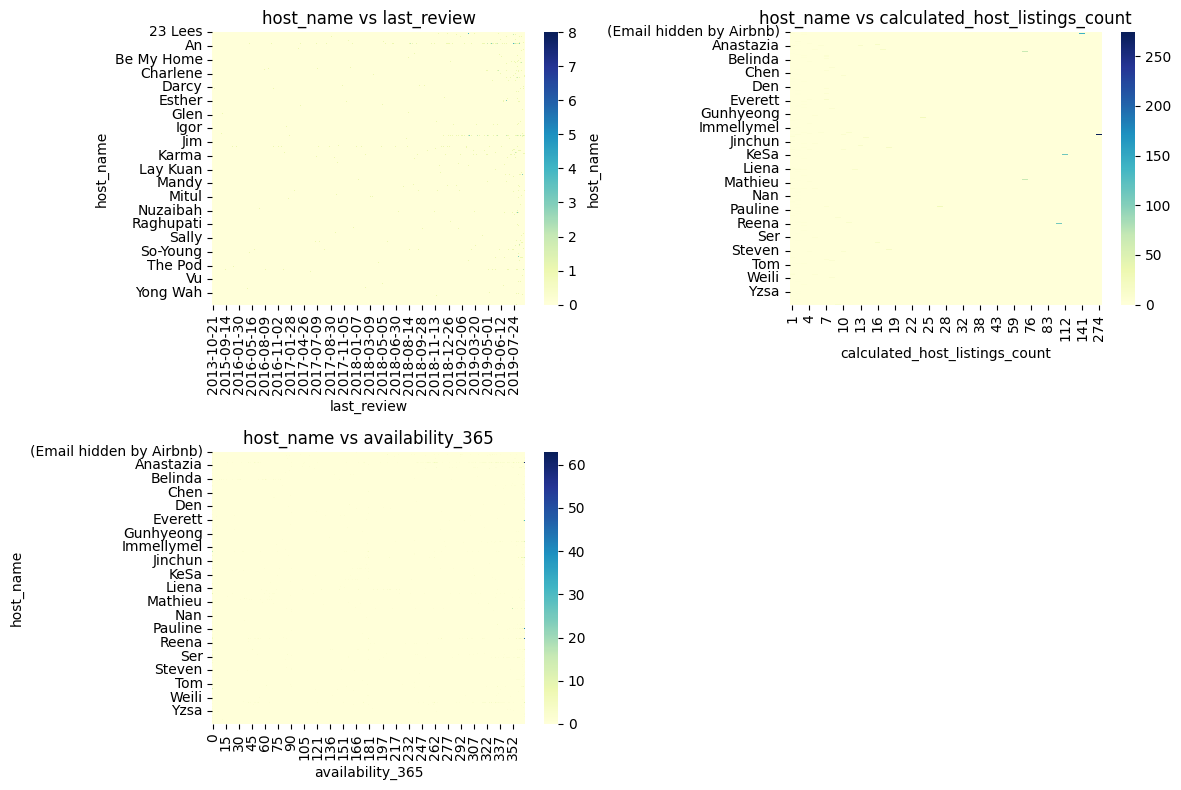

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('listings.csv')

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(data)

# Count occurrences of combinations
heatmap_last_review = df.groupby(['host_name', 'last_review']).size().unstack(fill_value=0)
heatmap_listings_count = df.groupby(['host_name', 'calculated_host_listings_count']).size().unstack(fill_value=0)
heatmap_availability = df.groupby(['host_name', 'availability_365']).size().unstack(fill_value=0)

# Plot heatmaps
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.heatmap(heatmap_last_review, cmap='YlGnBu')
plt.title('host_name vs last_review')

plt.subplot(2, 2, 2)
sns.heatmap(heatmap_listings_count, cmap='YlGnBu')
plt.title('host_name vs calculated_host_listings_count')

plt.subplot(2, 2, 3)
sns.heatmap(heatmap_availability, cmap='YlGnBu')
plt.title('host_name vs availability_365')

plt.tight_layout()
plt.show()

<font color="lightbeige" size=+1.0><b>Neighbourhood Distribution</b></font>

> ``Which regions have the highest prices, and which room types are the most expensive in terms of price in the dataset based on their respective categories?``

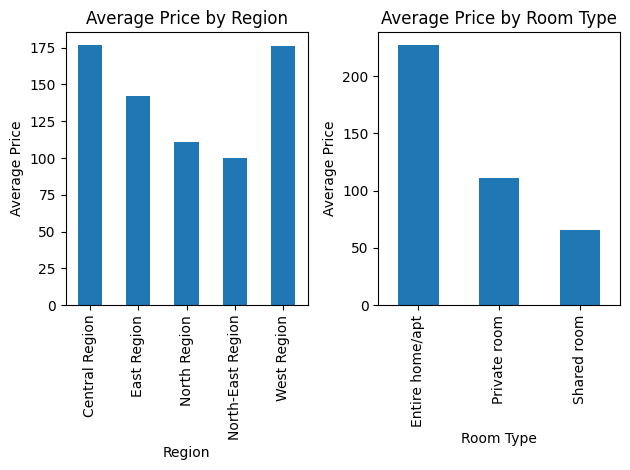

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Plot graph to find the solution 
grouped_region = data.groupby('neighbourhood_group')['price'].mean()
highest_price_region = grouped_region.idxmax()
grouped_room = df.groupby('room_type')['price'].mean()
most_expensive_room = grouped_room.idxmax()
# Plotting the region with the highest price
plt.subplot(1, 2, 1)
grouped_region.plot(kind='bar')
plt.title('Average Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')

# Plotting the most expensive room types
plt.subplot(1, 2, 2)
grouped_room.plot(kind='bar')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

plt.tight_layout()  # To adjust the spacing between subplots
plt.show()

<font color="lightbeige" size=+1.0><b>Neighbourhood Group Distribution</b></font>

> ``Which region has the largest longitude and determine the average longitude of the said region? ``

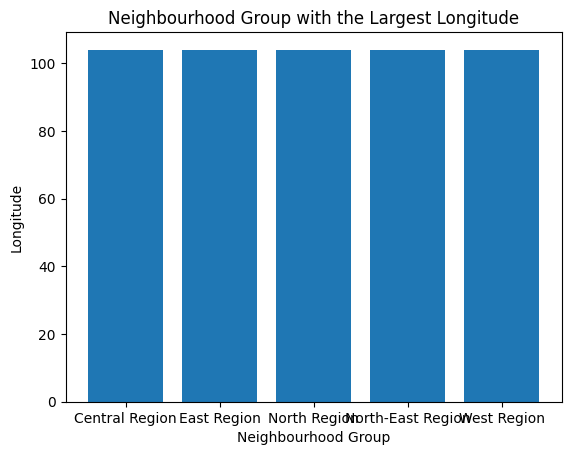

Average Longitude of the Region with the Largest Longitude: 103.92998639763779


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by neighbourhood_group and find the maximum longitude
max_longitude = data.groupby('neighbourhood_group')['longitude'].max()

# Plot the region with the largest longitude
plt.bar(max_longitude.index, max_longitude.values)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Longitude')
plt.title('Neighbourhood Group with the Largest Longitude')
plt.show()

# Calculate the average longitude for the region with the largest longitude
largest_longitude_region = max_longitude.idxmax()
average_longitude = data[data['neighbourhood_group'] == largest_longitude_region]['longitude'].mean()

print("Average Longitude of the Region with the Largest Longitude:", average_longitude)

<font color="lightbeige" size=+1.0><b>Scatter Plot | Host</b></font>

> ``Which hosts had the lowest number of reviews and minimum nights for stays?``

C:\Users\spook\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33673 (\N{CJK UNIFIED IDEOGRAPH-8389}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\spook\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65404 (\N{HALFWIDTH KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\spook\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65437 (\N{HALFWIDTH KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\spook\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\spook\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 

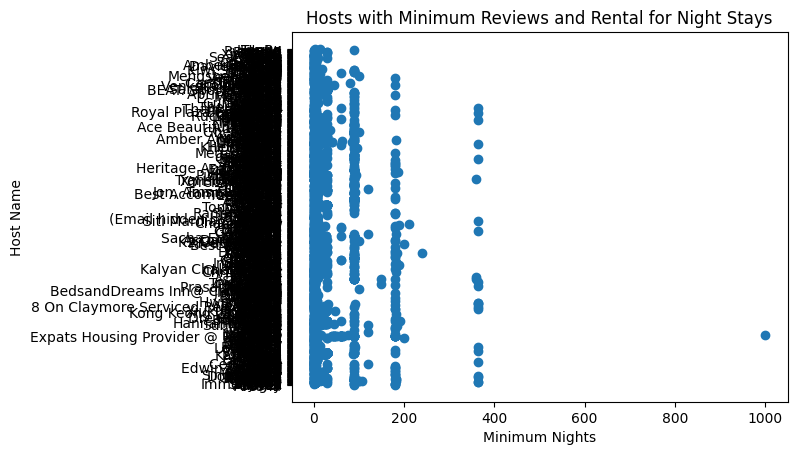

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the required columns
host_reviews = data[['host_name', 'number_of_reviews', 'minimum_nights']]

# Filter the data to get the hosts with minimum reviews
hosts_min_reviews = host_reviews[host_reviews['number_of_reviews'] == host_reviews['number_of_reviews'].min()]

# Plot the scatter plot
plt.scatter(hosts_min_reviews['minimum_nights'], hosts_min_reviews['host_name'])
plt.xlabel('Minimum Nights')
plt.ylabel('Host Name')
plt.title('Hosts with Minimum Reviews and Rental for Night Stays')
plt.show()

<font color="lightbeige" size=+1.0><b>Line Chart | Host Name</b></font>

> ``When was Lena’s last review from Jurong west neighbourhood in Singapore?``

C:\Users\spook\AppData\Local\Temp\ipykernel_984\3517240040.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lena_data['last_review'] = pd.to_datetime(lena_data['last_review'])
C:\Users\spook\AppData\Local\Temp\ipykernel_984\3517240040.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lena_data.sort_values('last_review', inplace=True)


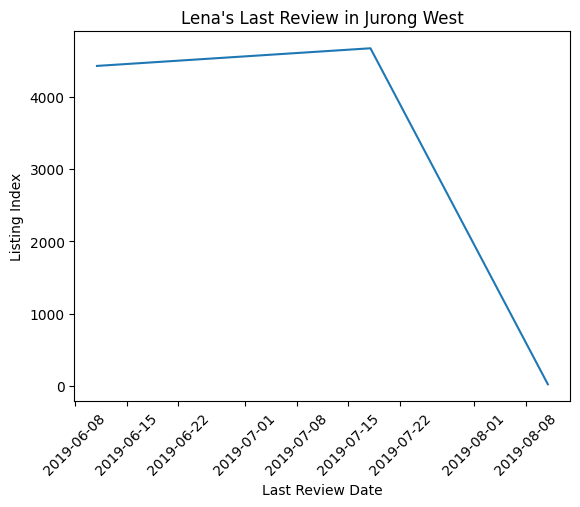

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the data for Lena in Jurong West neighborhood
lena_data = data[(data['host_name'] == 'Lena') & (data['neighbourhood'] == 'Jurong West')]

# Convert last_review column to datetime format
lena_data['last_review'] = pd.to_datetime(lena_data['last_review'])

# Sort the data by last_review in ascending order
lena_data.sort_values('last_review', inplace=True)

# Create the line chart
plt.plot(lena_data['last_review'], lena_data.index)

# Set the plot labels and title
plt.xlabel('Last Review Date')
plt.ylabel('Listing Index')
plt.title('Lena\'s Last Review in Jurong West')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<font color="lightbeige" size=+1.0><b>Waterfall Chart | Room</b></font>

> ``Which room numbers and types have the highest availability and receive the most reviews per month?``

C:\Users\spook\AppData\Local\Temp\ipykernel_32960\2410821515.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\spook\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


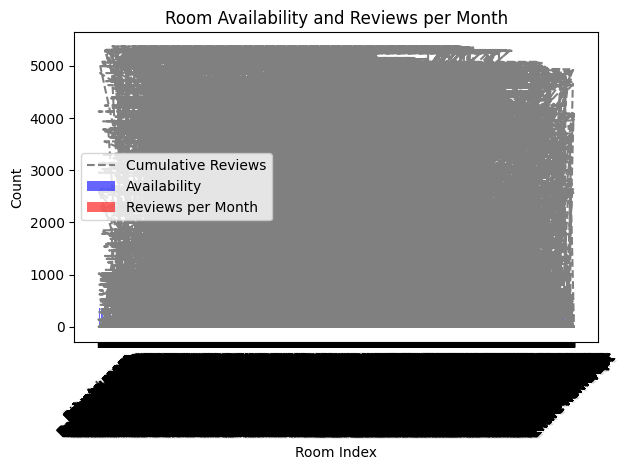

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('listings.csv')

# Select the required columns
room_data = data[['availability_365', 'room_type', 'reviews_per_month']]

# Sort the data by availability in descending order
room_data = room_data.sort_values(by='availability_365', ascending=False)

# Calculate cumulative sum of reviews per month
room_data['cumulative_reviews'] = room_data['reviews_per_month'].cumsum()

# Set the initial y-coordinate for the waterfall chart
y_pos = room_data['cumulative_reviews'].shift(1).fillna(0)

# Plot the waterfall chart
plt.bar(room_data.index, room_data['availability_365'], color='blue', alpha=0.6, label='Availability')
plt.bar(room_data.index, -room_data['reviews_per_month'], color='red', alpha=0.6, label='Reviews per Month')
plt.plot(room_data.index, y_pos, color='gray', linestyle='--', label='Cumulative Reviews')
plt.xlabel('Room Index')
plt.ylabel('Count')
plt.title('Room Availability and Reviews per Month')
plt.legend()
plt.xticks(room_data.index, room_data['room_type'], rotation=45)
plt.tight_layout()
plt.show()

<font color="lightbeige" size=+1.0><b>Boxplot | Neighbourhood vs Host Listings</b></font>

<Figure size 1000x600 with 0 Axes>

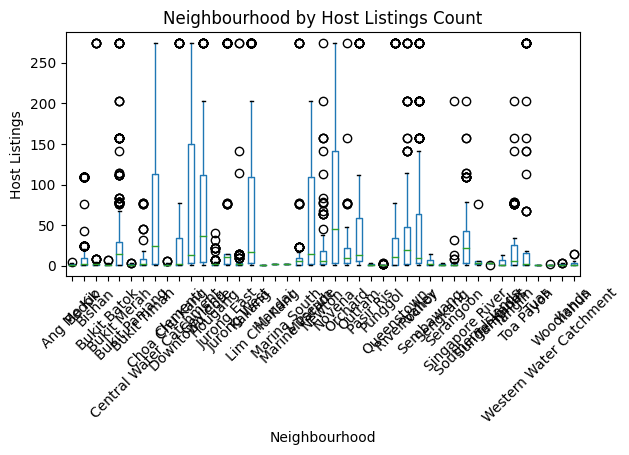

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the required columns
room_neighbourhood_data = data[['neighbourhood', 'calculated_host_listings_count']]

# Create a boxplot
plt.figure(figsize=(10, 6))
boxplot = room_neighbourhood_data.boxplot(by='neighbourhood', column='calculated_host_listings_count', grid=False)
plt.xlabel('Neighbourhood')
plt.ylabel('Host Listings')
plt.title('Neighbourhood by Host Listings Count')
plt.suptitle('')  # Remove the default title
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color="lightbeige" size=+1.5><b>Methodology</b></font>

- Research Question → "*What factors influence the pricing of Airbnb listings in Singapore, and how do these factors relate to customer reviews and satisfaction?*"
- Data Collection: obtained dataset relevant to research question.
- Data Cleaning and Preprocessing: Thoroughly examine the dataset to identify any inconsistencies, missing values, or outliers. Cleaning the data by handling missing values, removing duplicates, correcting errors, and transforming data types. 
- Exploratory Data Analysis (EDA): Performed exploratory analysis to understand the structure, patterns, and relationships within the dataset using visualizations (i.e., histograms, scatter plots, box plots), and correlation analysis.
- Feature Engineering: derive meaningful insights from the existing features to enhance the dataset's predictive power or explanatory capabilities.
- Data Modeling and Analysis: Apply appropriate statistical or machine learning techniques to analyze the dataset and answer the research question.
- Model Evaluation and Validation: Assess the performance and validity of the models or analysis results using suitable evaluation metrics and validation techniques. This ensures that the findings are reliable and generalize well to unseen data. 

<font color="lightbeige" size=+1.0><b>DS Questions</b></font>

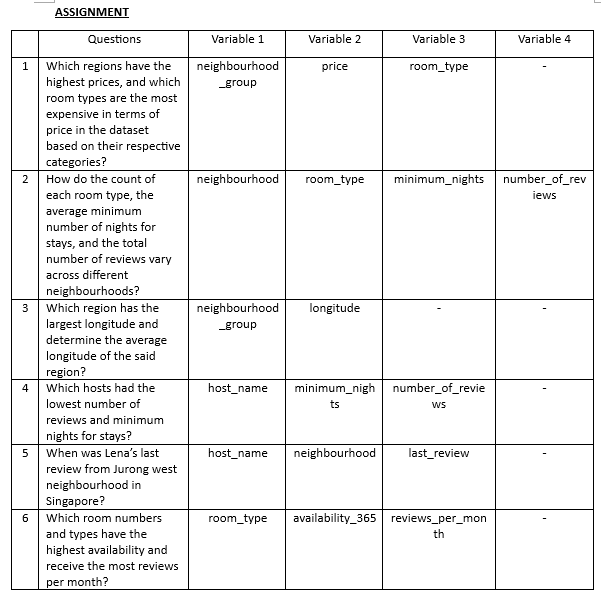

<font color="lightbeige" size=+1.0><b>Data used for analysis</b></font>

In [6]:
import pandas as pd

# Columns used for analysis
selected_columns = data[['neighbourhood_group', 'neighbourhood', 'price', 'room_type', 'minimum_nights', 'number_of_reviews', 'longitude', 'host_name', 'last_review', 'availability_365', 'reviews_per_month']]

# Display the selected columns
print(selected_columns)


     neighbourhood_group neighbourhood  price        room_type  \
0           North Region     Woodlands     83     Private room   
1         Central Region   Bukit Timah     81     Private room   
2           North Region     Woodlands     69     Private room   
3            East Region      Tampines    206     Private room   
4            East Region      Tampines     94     Private room   
...                  ...           ...    ...              ...   
7902      Central Region    Queenstown    100  Entire home/apt   
7903      Central Region       Tanglin    550  Entire home/apt   
7904      Central Region       Kallang     58     Private room   
7905      Central Region  River Valley     56     Private room   
7906      Central Region  River Valley     65     Private room   

      minimum_nights  number_of_reviews  longitude  host_name last_review  \
0                180                  1  103.79580  Francesca  2013-10-21   
1                 90                 18  103.78521   

<font color="lightbeige" size=+1.0><b>References</b></font>

- https://matplotlib.org/stable/plot_types/index.html
- https://www.altexsoft.com/blog/datascience/preparing-your-dataset-for-machine-learning-8-basic-techniques-that-make-your-data-better/ 
- https://www.kaggle.com/code/fraxmans/eda-for-airbnb-listings 
- https://www.kaggle.com/code/ziyaanahmad/air-bnb 
- https://www.techtarget.com/searchbusinessanalytics/feature/Data-preparation-in-machine-learning-6-key-steps 
- https://www.geeksforgeeks.org/data-analysis-with-python/ 